**Q1**. for a matrix multiplication between a (n, k) and (k, m) matrix, for each position in the matrix we will have k columns in a specific row of matrix1 multiplied by k rows of specific column of matrix2. these multiplied quantities shall be k in quatity thus will be added k-1 times. Thus, for each position there are 'k' multiplications and 'k-1' additions.
For the entire matrix k*n*m multiplication operations would have to be performed corresponding to the size of the resulting matrix. similarly (k-1)*n*m addition operations will be performed.

# **Q2.**

In [56]:
%%timeit   #using the list of lists approach

A = [[12, 7, 3],[4, 5, 6],[7, 8, 9]]
 
B = [[5, 8, 1, 2],[6, 7, 3, 0],[4, 5, 9, 1]]
     
result = [[0, 0, 0, 0],[0, 0, 0, 0], [0, 0, 0, 0]]
 
for i in range(len(A)):
     for j in range(len(B[0])): 
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]

# for r in result:
#     print(r)



15.4 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [57]:
%%timeit  #same approach for a larger matrix size
B = [[12, 7, 3],[4, 5, 6],[7, 8, 9], [5, 8, 2],[6, 3, 0],[5, 9, 1],[12, 7, 3],[4, 5, 6],[7, 8, 9]]
 
A = [[5, 8, 2, 6, 3, 0,5, 9, 1],[12, 7, 3,4, 5, 6,7, 8, 9], [5, 8, 2,6, 3, 0,5, 9, 1]]
     
result = [[0, 0, 0],[0, 0, 0], [0, 0, 0]]
 
for i in range(len(A)):
     for j in range(len(B[0])): 
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]

# for r in result:
#     print(r)

31.2 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [85]:
%%timeit #using numPy

import numpy as np
A = [[12, 7, 3],[4, 5, 6],[7, 8, 9]]
 
B = [[5, 8, 1, 2],[6, 7, 3, 0],[4, 5, 9, 1]]
     
result = [[0, 0, 0, 0],[0, 0, 0, 0], [0, 0, 0, 0]]
 
result = np.dot(A,B)
 
# for r in result:
#     print(r)

27.5 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
%%timeit #same code for a larger matrix size

import numpy as np
B = [[12, 7, 3],[4, 5, 6],[7, 8, 9], [5, 8, 2],[6, 3, 0],[5, 9, 1],[12, 7, 3],[4, 5, 6],[7, 8, 9]]
 
A = [[5, 8, 2, 6, 3, 0,5, 9, 1],[12, 7, 3,4, 5, 6,7, 8, 9], [5, 8, 2,6, 3, 0,5, 9, 1]]
     
result = [[0, 0, 0],[0, 0, 0], [0, 0, 0]]
 
result = np.dot(A,B)
 
# for r in result:
#     print(r)

45.4 µs ± 8.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As we findout:

for a relatively smaller matrix:

time for list of lists approach- 29.7 µs ± 482 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

time for numPy- 14.3 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Here, numPy runs for 10,000 loops yet the the time is half than that in list of lists approach, even after taking into consideration the std deviation.

for a relatively larger matrix size:

time for list of lists approach- 49.4 µs ± 638 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

time for numPy- 24.2 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

here, the time complexity of numPy has increased considerably but is still half of that of the other approach for 7 runs and 10,000 loops.


Here we see that the NumPy approach is faster than List of Lists approach, the reason for which can be:  

A list stores data in non-contagious memory locations unlike numpy arrays where data is stored in contagious blocks of memory thus, increasing the efficiency of the operations.

NumPy operations are implemented in C,C++ which is a faster programming language having very little execution time than Python, thus making them faster manipulations compared to Python lists.

NumPy uses less memory than Python lists as it stores data in a more compact form cutting short on the storing of metadata. This factor shall also prove crucial in affecting the speed of the operations for large data.

The NumPy library processes the fragments on which the operation is applied parallely unlike lists which works for each element one by one.

# **Q3.**

In [60]:
#finding median by traversing the array to sort the array then find the median according to whether the length of the array is even or odd
a=[7,5,18,9,1,17]

for i in range(len(a)):
    min_i=i
    for j in range(i+1,len(a)):
        if a[min_i]>a[j]:
            min_i=j
    a[i], a[min_i]=a[min_i], a[i] #swapping as we want minimum element in the begining

# Array has odd length, return element at index (n-1)//2
if (len(a)%2==1):
    print (a[(len(a)-1)//2])

# Array has even length, return average of elements at indices (n-1)//2 and n//2
else:
    print ((a[(len(a)-1)//2] + a[len(a)//2]) / 2)
    

# time complexity- order [len(array)]^2 or N^2        
    

8.0


In [61]:
%%time
#finding median using a better approach than the previous one, here we are using the 'sorted' command which sorts the array in n(log(n)) order.

def find_median(arr):
    arr = sorted(arr)
    n = len(arr)
    if n % 2 == 1:
        # Array has odd length, return element at index (n-1)//2
        return arr[(n-1)//2]
    else:
        # Array has even length, return average of elements at indices (n-1)//2 and n//2
        return (arr[(n-1)//2] + arr[n//2]) / 2

a = [7,5,18,9,1,17,7,5,18,9,1,17,7,5,18,9,1,17]
(find_median(a))

#The time complexity of this implementation is O(n*log(n)),
#because the sorted function has a time complexity of O(n log n).

CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 43.6 µs


8.0

In [62]:
%%time
##finding median using numPy 
import numpy
a = [7,5,18,9,1,17,7,5,18,9,1,17,7,5,18,9,1,17]
(numpy.median(a))

CPU times: user 307 µs, sys: 16 µs, total: 323 µs
Wall time: 335 µs


8.0

here, we see that the time req by numpy.median is more than that of the previous approach.
For a very large length of array numpy.median will prove to be more time efficient.

## **Q4.**

The gradient of a function is a vector of its partial derivatives with respect to each variable. The gradient of the function 
(x^2)y + (y^3)(sin(x)) with respect to x and y is:

[2xy + (y^3)cos(x), x^2 + 3(y^2)*sin(x)]

The first element of the gradient is the partial derivative of the function with respect to x, and the second element is the 
partial derivative with respect to y.

## **Q5**.

In [63]:
pip install jax


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import jax
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return (x**2)*y + (y**3)*jnp.sin(x)

def numerical(x,y):
  return ((2*x*y)+(y**3)*jnp.cos(x) , (x**2)+3*(y**2)*jnp.sin(x))

df_dx=jax.grad(f,argnums=(0,1))(1.0,2.0)
#df_dy=grad(f,argnums=1)

print (df_dx)
print (numerical(1.0,2.0))

(DeviceArray(8.322418, dtype=float32, weak_type=True), DeviceArray(11.0976515, dtype=float32, weak_type=True))
(DeviceArray(8.322418, dtype=float32, weak_type=True), DeviceArray(11.0976515, dtype=float32, weak_type=True))


for x=1 and y=2 we receive the same answer for gradient, thus verifying the JAX method

# **Q6.**

In [65]:
import sympy

x, y = sympy.symbols('x y')
func = (x**2)*y + (y**3)*sympy.sin(x)

gradient = sympy.Matrix([func]).jacobian([x, y])
print(gradient)



Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


this is the same ans as we had calculated through the analytical approach


# **Q7.**

In [66]:
students = {
    2022: {
        'Branch 1': {
            1: {
                'Roll Number': 1,
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            }
        },
        'Branch 2': {},
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {},
    }
}
print (students)

{2022: {'Branch 1': {1: {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


# **Q8.**

In [67]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, students):
        self.students = students

class Year:
    def __init__(self, branches):
        self.branches = branches

class Database:
    def __init__(self, years):
        self.years = years

# Create a database with four years
database = Database([
    Year([
        Branch([
            Student(1, 'N', {'Maths': 100, 'English': 70})
        ]),
        Branch([])
    ]),
    Year([
        Branch([]),
        Branch([])
    ]),
    Year([
        Branch([]),
        Branch([])
    ]),
    Year([
        Branch([]),
        Branch([])
    ])
])

# **Q9.**

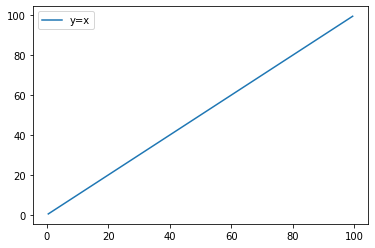

In [68]:
#1.
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from 0.5 to 100.0 with a step size of 0.5
x = np.arange(0.5, 100.0, 0.5)
# Calculate the y values using the function y = x^2
y = x
# Plot the function
plt.plot(x, y, label='y=x')
plt.legend()
plt.show()

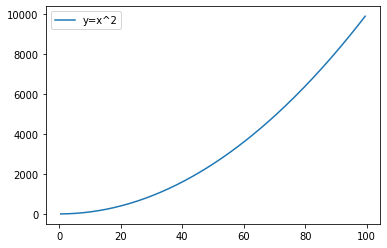

In [69]:
#2.

x = np.arange(0.5, 100.0, 0.5)
y=x**2
plt.plot(x, y, label='y=x^2')
plt.legend()
plt.show()

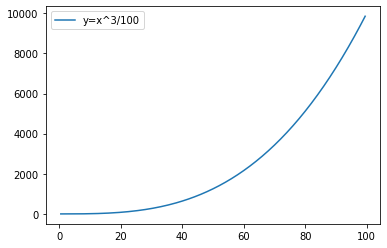

In [70]:
#3.
x = np.arange(0.5, 100.0, 0.5)
y = x**3/100
plt.plot(x, y, label='y=x^3/100')
plt.legend()
plt.show()

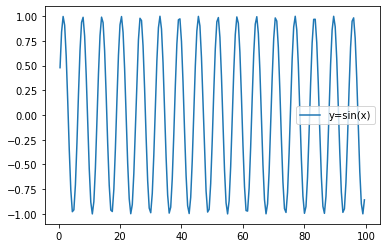

In [71]:
#4.
x = np.arange(0.5, 100.0, 0.5)
y = np.sin(x)
plt.plot(x, y, label='y=sin(x)')
plt.legend()
plt.show()

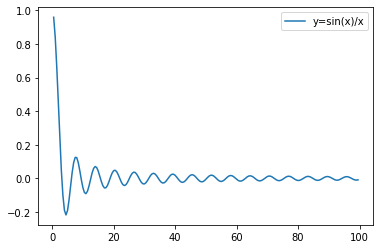

In [72]:
#5.
x = np.arange(0.5, 100.0, 0.5)
y = np.sin(x)/x
plt.plot(x, y, label='y=sin(x)/x')
plt.legend()
plt.show()

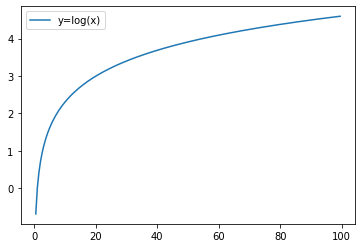

In [73]:
#6.
x = np.arange(0.5, 100.0, 0.5)
y = np.log(x)
plt.plot(x, y, label='y=log(x)')
plt.legend()
plt.show()

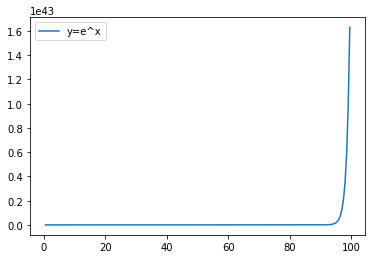

In [74]:
#7.
x = np.arange(0.5, 100.0, 0.5)
y = np.exp(x)
plt.plot(x, y, label='y=e^x')
plt.legend()
plt.show()

# **Q10.**

In [75]:
import numpy as np
# Using random.uniform to generate the matrix of 20x5 of random numbers
#in the range of 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix)


[[1.26355555 1.24682262 1.44057298 1.59387855 1.67180846]
 [1.70517444 1.68528952 1.77233143 1.19144977 1.01000504]
 [1.90532242 1.36394186 1.55222645 1.87149029 1.50508608]
 [1.67616273 1.79424282 1.91117624 1.3639433  1.99889888]
 [1.01811684 1.71460032 1.80130818 1.95205528 1.60730721]
 [1.41976927 1.47158217 1.59183622 1.88256951 1.28341003]
 [1.55292891 1.18881563 1.5159525  1.94498955 1.99424189]
 [1.4676084  1.95059468 1.87004874 1.59945645 1.93610277]
 [1.10402571 1.50865847 1.74250645 1.44902122 1.00609001]
 [1.13162909 1.22673432 1.58532336 1.01038238 1.86349021]
 [1.6397086  1.39720119 1.83411386 1.13397764 1.01955499]
 [1.32400552 1.65995083 1.69012795 1.0275566  1.94979781]
 [1.02303944 1.00298457 1.33896292 1.29567805 1.46927974]
 [1.43783172 1.71401561 1.83190149 1.4863784  1.88503247]
 [1.85403102 1.33219688 1.55519031 1.57923066 1.96664739]
 [1.67759887 1.85974369 1.88507451 1.44453733 1.07294701]
 [1.19170538 1.83574634 1.7574241  1.0505326  1.40540185]
 [1.87823182 1

In [76]:
import pandas as pd 

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
print(df)


           a         b         c         d         e
0   1.263556  1.246823  1.440573  1.593879  1.671808
1   1.705174  1.685290  1.772331  1.191450  1.010005
2   1.905322  1.363942  1.552226  1.871490  1.505086
3   1.676163  1.794243  1.911176  1.363943  1.998899
4   1.018117  1.714600  1.801308  1.952055  1.607307
5   1.419769  1.471582  1.591836  1.882570  1.283410
6   1.552929  1.188816  1.515952  1.944990  1.994242
7   1.467608  1.950595  1.870049  1.599456  1.936103
8   1.104026  1.508658  1.742506  1.449021  1.006090
9   1.131629  1.226734  1.585323  1.010382  1.863490
10  1.639709  1.397201  1.834114  1.133978  1.019555
11  1.324006  1.659951  1.690128  1.027557  1.949798
12  1.023039  1.002985  1.338963  1.295678  1.469280
13  1.437832  1.714016  1.831901  1.486378  1.885032
14  1.854031  1.332197  1.555190  1.579231  1.966647
15  1.677599  1.859744  1.885075  1.444537  1.072947
16  1.191705  1.835746  1.757424  1.050533  1.405402
17  1.878232  1.144442  1.476335  1.444331  1.

In [77]:
# Compute the standard deviation usinf std
stdeviations = df.std(axis=0) #axis=0, represents that we want to find the std deviation of the columns
print(stdeviations)

# Find the column with the highest standard deviation using 'idxmax()'
max_std = stdeviations.idxmax()
print("Column with highest standard deviation:", (max_std))


a    0.286607
b    0.299149
c    0.168844
d    0.296415
e    0.365734
dtype: float64
Column with highest standard deviation: e


In [78]:
# Compute the mean of each row using mean function in pandas
means = df.mean(axis=1) #axis=1 represents the rows in the dataframe
print(means)

# Find the row with the lowest mean usinf the function idxmin()
min_mean_row = means.idxmin()
print("Row with lowest mean:", (min_mean_row))


0     1.443328
1     1.472850
2     1.639613
3     1.748885
4     1.618678
5     1.529833
6     1.639386
7     1.764762
8     1.362060
9     1.363512
10    1.404911
11    1.530288
12    1.225989
13    1.671032
14    1.657459
15    1.587980
16    1.448162
17    1.495685
18    1.556426
19    1.551073
dtype: float64
Row with lowest mean: 12


# **Q11.**

In [79]:
# Adding a new column "f" which is the sum of columns "a", "b", "c", "d", and "e"
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.263556  1.246823  1.440573  1.593879  1.671808  7.216638
1   1.705174  1.685290  1.772331  1.191450  1.010005  7.364250
2   1.905322  1.363942  1.552226  1.871490  1.505086  8.198067
3   1.676163  1.794243  1.911176  1.363943  1.998899  8.744424
4   1.018117  1.714600  1.801308  1.952055  1.607307  8.093388
5   1.419769  1.471582  1.591836  1.882570  1.283410  7.649167
6   1.552929  1.188816  1.515952  1.944990  1.994242  8.196928
7   1.467608  1.950595  1.870049  1.599456  1.936103  8.823811
8   1.104026  1.508658  1.742506  1.449021  1.006090  6.810302
9   1.131629  1.226734  1.585323  1.010382  1.863490  6.817559
10  1.639709  1.397201  1.834114  1.133978  1.019555  7.024556
11  1.324006  1.659951  1.690128  1.027557  1.949798  7.651439
12  1.023039  1.002985  1.338963  1.295678  1.469280  6.129945
13  1.437832  1.714016  1.831901  1.486378  1.885032  8.355160
14  1.854031  1.332197  1.555190  1.579231  1.966647  8

In [80]:
# Creating a column "g" with values "LT8" or "GT8" based on the values in column "f"
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)


           a         b         c         d         e         f    g
0   1.263556  1.246823  1.440573  1.593879  1.671808  7.216638  LT8
1   1.705174  1.685290  1.772331  1.191450  1.010005  7.364250  LT8
2   1.905322  1.363942  1.552226  1.871490  1.505086  8.198067  GT8
3   1.676163  1.794243  1.911176  1.363943  1.998899  8.744424  GT8
4   1.018117  1.714600  1.801308  1.952055  1.607307  8.093388  GT8
5   1.419769  1.471582  1.591836  1.882570  1.283410  7.649167  LT8
6   1.552929  1.188816  1.515952  1.944990  1.994242  8.196928  GT8
7   1.467608  1.950595  1.870049  1.599456  1.936103  8.823811  GT8
8   1.104026  1.508658  1.742506  1.449021  1.006090  6.810302  LT8
9   1.131629  1.226734  1.585323  1.010382  1.863490  6.817559  LT8
10  1.639709  1.397201  1.834114  1.133978  1.019555  7.024556  LT8
11  1.324006  1.659951  1.690128  1.027557  1.949798  7.651439  LT8
12  1.023039  1.002985  1.338963  1.295678  1.469280  6.129945  LT8
13  1.437832  1.714016  1.831901  1.486378  1.88

In [81]:
# Count the number of rows where column "g" is "LT8"
lt8_count = df.query("g == 'LT8'").shape[0] # .shape returns the size of the row 
print("Number of rows where column 'g' is 'LT8':", (lt8_count))


Number of rows where column 'g' is 'LT8': 13


In [82]:
# Finding std deviation of column "f" for rows where column "g" is "LT8"
lt8_std = df.query("g == 'LT8'")['f'].std()
print("Standard deviation of column 'f' for rows where column 'g' is 'LT8':", (lt8_std))

# The std deviation of column "f" for rows where column "g" is "GT8"
gt8_std = df.query("g == 'GT8'")['f'].std()
print("Standard deviation of column 'f' for rows where column 'g' is 'GT8':", (gt8_std))


Standard deviation of column 'f' for rows where column 'g' is 'LT8': 0.5048476716303651
Standard deviation of column 'f' for rows where column 'g' is 'GT8': 0.2850518347203997


# **Q12**.

Broadcasting in NumPy allows us to perform operations on arrays without any constrain of array size and without creating any loops.
Here generally, the smaller array is "broadcasted" to the larger array, so as to have a compatible size in result. Thus, it facilitates
performing arithmetic operations among arrays with different shapes and sizes.

In [83]:
import numpy as np

x = np.array([1, 2, 3])
print(x)

y = np.array([[5, 6, 7], [8, 9, 10]])
print(y)

result = x + y
print(result)




[1 2 3]
[[ 5  6  7]
 [ 8  9 10]]
[[ 6  8 10]
 [ 9 11 13]]


# **Q13.**

In [84]:
def argmin(arr):
    # Find the index of the minimum element
    index = 0
    min_value = arr[0]
    for i, value in enumerate(arr):
        if value < min_value:
            index = i
            min_value = value
    return index
import numpy as np

# Create a numpy array
arr = np.array([4, 3, 2, 1, 5])

# Find the argmin of the array using the function
argmin = argmin(arr)
print(argmin) 

# Verify the result using np.argmin
print(np.argmin(arr))


3
3
